In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150


In [2]:
test_df = pd.read_csv('./DATA/winequality-red-test.csv')

wine_df = pd.read_csv('./DATA/winequality-red-train.csv')
wine_df.describe()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000
mean,805.058640,8.344566,0.525035,0.274707,2.465090,0.087077,15.940188,46.261142,0.996730,3.313049,0.657561,10.413305,5.666927
std,458.226479,1.742294,0.179988,0.192041,1.277385,0.044866,10.375507,33.358796,0.001828,0.152954,0.155208,1.071355,0.813670
min,1.000000,4.700000,0.120000,0.000000,1.200000,0.012000,1.000000,6.000000,0.990200,2.740000,0.370000,8.400000,3.000000
25%,414.000000,7.100000,0.390000,0.100000,1.900000,0.070000,7.000000,22.000000,0.995570,3.210000,0.560000,9.500000,5.000000
50%,808.000000,7.900000,0.520000,0.260000,2.200000,0.080000,14.000000,38.000000,0.996760,3.310000,0.630000,10.100000,6.000000
75%,1191.000000,9.400000,0.640000,0.430000,2.500000,0.090000,22.000000,60.000000,0.997810,3.410000,0.720000,11.000000,6.000000
max,1597.000000,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
X = wine_df.iloc[:, :-1]
y = wine_df.quality

X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.9)

X_test = test_df.iloc[:, :-1]
y_test = test_df.quality

array([[<AxesSubplot:title={'center':'Unnamed: 0'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'alcohol'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'chlorides'}, xlabel='[quality]'>],
       [<AxesSubplot:title={'center':'citric acid'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'density'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'fixed acidity'}, xlabel='[quality]'>],
       [<AxesSubplot:title={'center':'free sulfur dioxide'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'pH'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'residual sugar'}, xlabel='[quality]'>],
       [<AxesSubplot:title={'center':'sulphates'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}, xlabel='[quality]'>,
        <AxesSubplot:title={'center':'volatile acidity'}, xlabel='[quality]'>]],
      dtype=object)

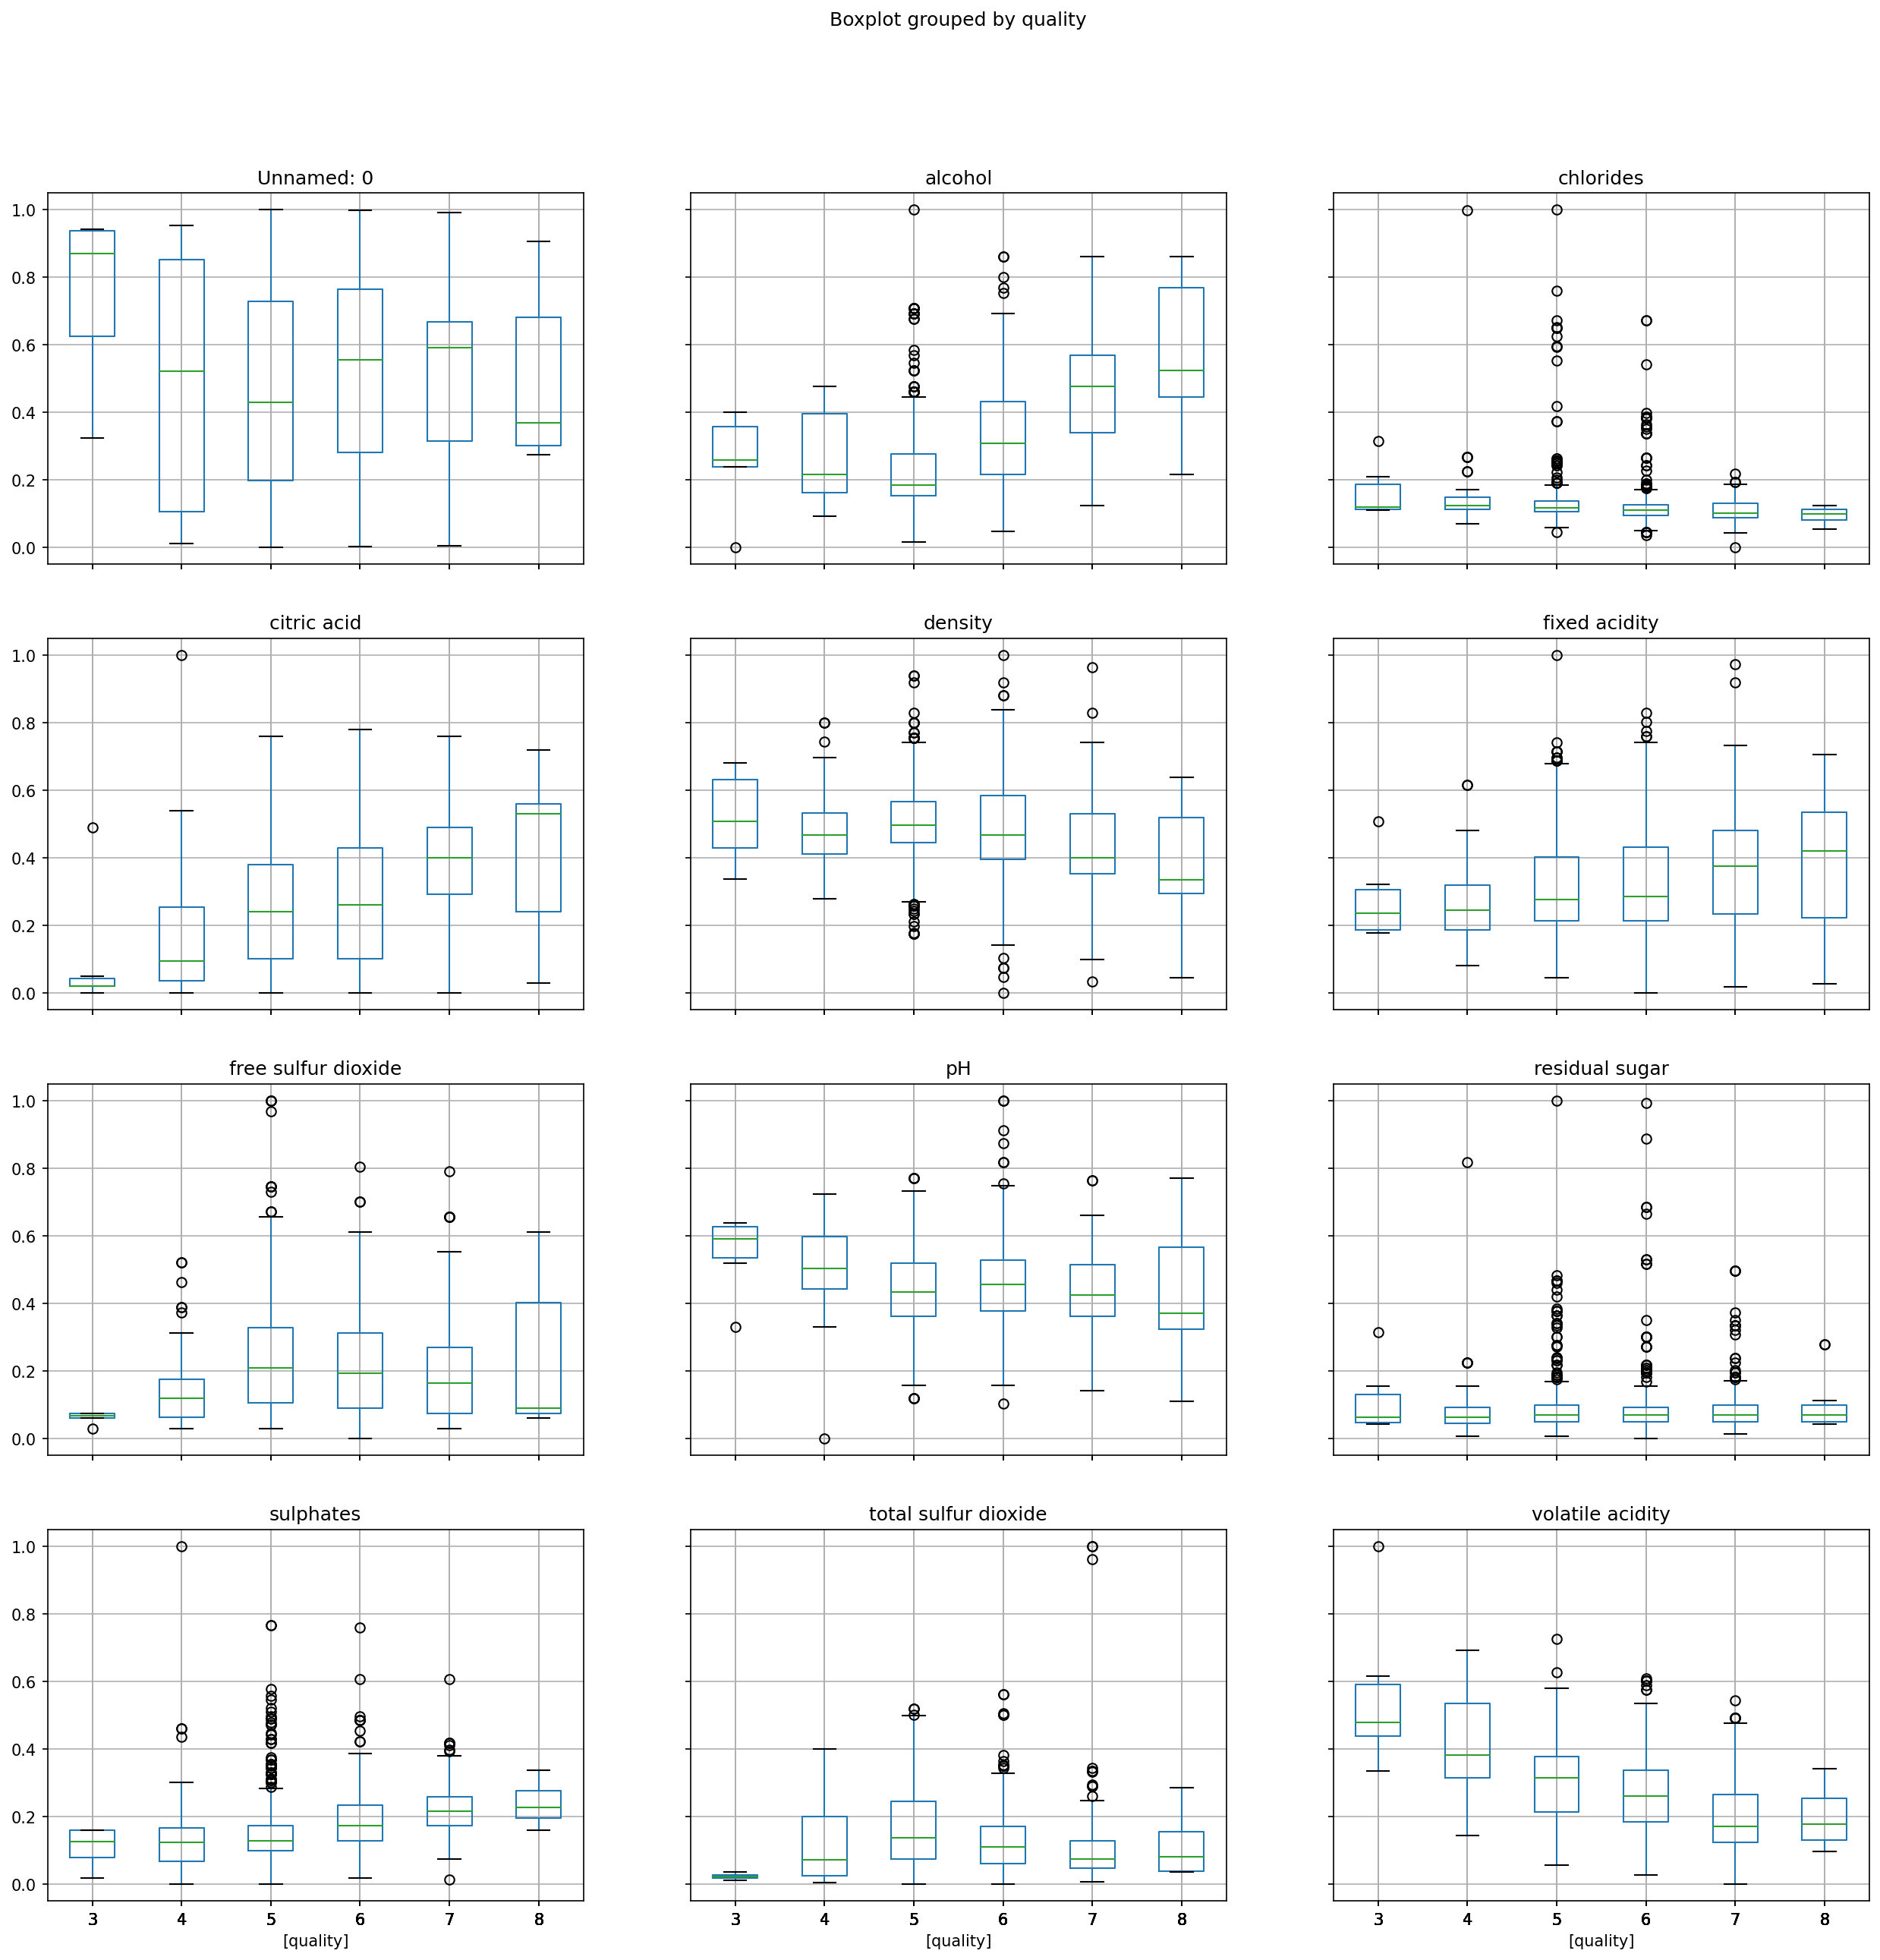

In [4]:
reg = (X-X.min())/(X.max()-X.min())
reg['quality'] = y

reg.boxplot(by ='quality', figsize = (20, 20))

## Preliminary Analysis
As we can see from the data, most qualities of our wine can give an indication of the score obtained by tasters (all aspects of acidity from PH to Volatile Acidity being seemingly important), however the wide spread around the average values indicate that none of them in isolation can be used as a particularly accurate predictor

In [9]:
rf_r = RandomForestRegressor(max_features='sqrt', n_estimators=3000)

rf_r.fit(X_train, y_train)
y_hat = rf_r.predict(X_validation).round()

1 - np.mean(y_hat != y_validation)

0.796875

In [6]:
rf_c = RandomForestClassifier(max_features='sqrt', n_estimators=3000)

rf_c.fit(X_train, y_train)
y_hat = rf_c.predict(X_validation)

1 - np.mean(y_hat != y_validation)

0.796875

In [7]:
highest_acc = 0
max_feat_list = [i + 1 for i in range(X.shape[1] -1)]
max_feat_list.append('sqrt')
max_feat_list.append('log2')
max_feat_list.append('auto')
for features in max_feat_list:
    
    accuracy_list = []
    for _ in range(20):
        X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.8)
        rf_c = RandomForestClassifier(max_features= features)
        rf_c.fit(X_train, y_train)
        y_hat = rf_c.predict(X_validation).round()

        acc = 1 - np.mean(y_hat != y_validation)
        accuracy_list.append(acc)
    accuracy = np.mean(accuracy_list)
    print('max_features=', features, ':', accuracy)
    if accuracy > highest_acc:
        highest_acc = accuracy
        opt_features = features
        opt_accuracy = accuracy


max_features= 1 : 0.8037109375
max_features= 2 : 0.8033203125
max_features= 3 : 0.8111328125
max_features= 4 : 0.8064453125
max_features= 5 : 0.8134765625
max_features= 6 : 0.815625
max_features= 7 : 0.804296875
max_features= 8 : 0.80546875
max_features= 9 : 0.7990234375
max_features= 10 : 0.7970703125
max_features= 11 : 0.8041015625
max_features= sqrt : 0.8158203125
max_features= log2 : 0.810546875
max_features= auto : 0.812890625
optimal max_features:  sqrt
best accuracy:  0.8158203125


In [11]:

print('optimal max_features: ', opt_features)
print('best accuracy: ', opt_accuracy)
print('accuracy spread: ', max(accuracy_list) - min(accuracy_list))

optimal max_features:  sqrt
best accuracy:  0.8158203125
accuracy spread:  0.078125


## Model Analysis
Classification seems to be the most effective method of prediction, and Random Forests are remarkably effective at the task.
With an 8% spread of accuracy on the same hyperparameters, and about 2% difference of accuracy on the average of multiple hyperparameters, it appears that as long as the decision trees composing the forest are free to split as far as needed, we're able to obtain acceptable values of prediction

In [25]:
rf_c = RandomForestClassifier()

rf_c.fit(X, y)
y_hat= rf_c.predict(X_test)

acc = np.mean(y_test == y_hat)
ind_acc = np.mean((y_hat - y_test).abs() <= 1)
print('accuracy: ', int(acc*100), '%')
print('mislabel by at most 1 level: ', int(ind_acc*100), '%')


accuracy:  65 %
mislabel by at most 1 level:  96 %


## Conclusion
Our trained model is able, regardless of the high level of arbitrariety we would expect from a test based on the personal preference of tasters, to correctly classify 65% of our test data. further analysis reported above reveal that about a remaining 30% is mislabeled by only 1 level of quality, rendering the model higly useful for indicative predictions